# **Histogram**


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

!pip install matplotlib

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('survey-data.sqlite')

QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
print(pd.read_sql_query(QUERY, conn)) #Added print() to show output.

QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

conn.close() # Close the database connection

--2025-03-04 22:45:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  66.3MB/s    in 3.0s    

2025-03-04 22:45:12 (66.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]

   COUNT(*)
0     65437
  Table_Name
0       main
                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    

In [3]:
# 
# can you show all of field and data type from data source?
#

In [4]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Get the schema of the 'main' table
QUERY = "PRAGMA table_info(main)"
df_schema = pd.read_sql_query(QUERY, conn)

# Display the field names and data types
for index, row in df_schema.iterrows():
    print(f"Field: {row['name']}, Data Type: {row['type']}")

# Close the connection
conn.close()

Field: ResponseId, Data Type: INTEGER
Field: MainBranch, Data Type: TEXT
Field: Age, Data Type: TEXT
Field: Employment, Data Type: TEXT
Field: RemoteWork, Data Type: TEXT
Field: Check, Data Type: TEXT
Field: CodingActivities, Data Type: TEXT
Field: EdLevel, Data Type: TEXT
Field: LearnCode, Data Type: TEXT
Field: LearnCodeOnline, Data Type: TEXT
Field: TechDoc, Data Type: TEXT
Field: YearsCode, Data Type: TEXT
Field: YearsCodePro, Data Type: TEXT
Field: DevType, Data Type: TEXT
Field: OrgSize, Data Type: TEXT
Field: PurchaseInfluence, Data Type: TEXT
Field: BuyNewTool, Data Type: TEXT
Field: BuildvsBuy, Data Type: TEXT
Field: TechEndorse, Data Type: TEXT
Field: Country, Data Type: TEXT
Field: Currency, Data Type: TEXT
Field: CompTotal, Data Type: REAL
Field: LanguageHaveWorkedWith, Data Type: TEXT
Field: LanguageWantToWorkWith, Data Type: TEXT
Field: LanguageAdmired, Data Type: TEXT
Field: DatabaseHaveWorkedWith, Data Type: TEXT
Field: DatabaseWantToWorkWith, Data Type: TEXT
Field: Dat

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Corrected query
QUERY = """
SELECT ResponseId, CompTotal, COUNT(*)
FROM main
WHERE CompTotal IS NOT NULL -- AND ResponseId > 0
GROUP BY ResponseId, CompTotal
-- ORDER BY CompTotal, ResponseId
"""

df_comp_total_0 = pd.read_sql_query(QUERY, conn)

# Display the DataFrame
print(df_comp_total_0)

# Close the connection
conn.close()

       ResponseId  CompTotal  COUNT(*)
0              73  2040000.0         1
1             375    28000.0         1
2             380    85000.0         1
3             386    50000.0         1
4             390   110000.0         1
...           ...        ...       ...
33735       65397    36000.0         1
33736       65402    40000.0         1
33737       65409    61000.0         1
33738       65413    58000.0         1
33739       65432    55000.0         1

[33740 rows x 3 columns]


In [ ]:
# 1. Visualizing the distribution of data (Histograms)
# 1.1 Histogram of CompTotal (Total Compensation)
#
# Objective: Plot a histogram of CompTotal to visualize the distribution of respondents' total compensation.

# 1. 可視化資料分佈（直方圖）
# 1.1 CompTotal（總薪酬）直方圖 目標：繪製 CompTotal 直方圖，以直觀顯示受訪者總薪酬的分佈。
#

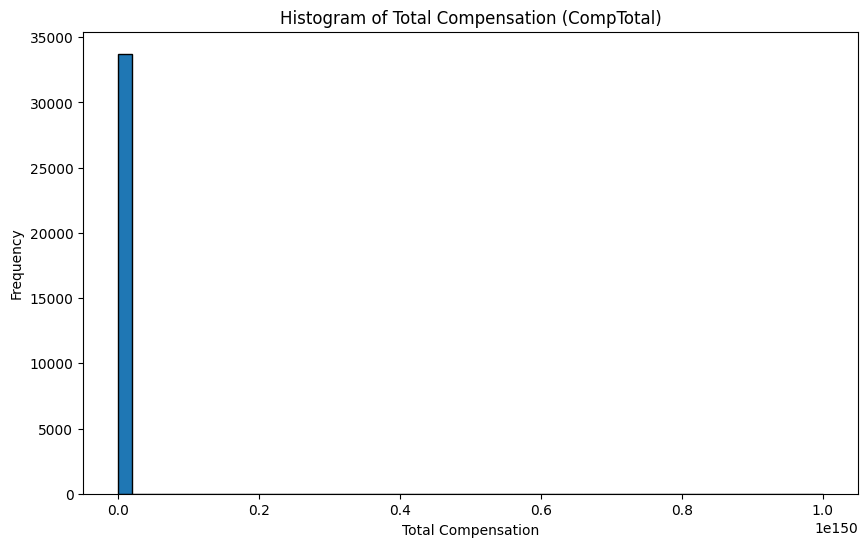

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# 1.1 Histogram of CompTotal (Total Compensation)
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comp_total = pd.read_sql_query(QUERY, conn)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comp_total['CompTotal'], bins=50, edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

# Close the connection
conn.close()

In [ ]:
#
# 目標：繪製 CompTotal 直方圖，以直觀顯示受訪者總薪酬的分佈。
#

In [25]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# 1.1 Histogram of CompTotal (Total Compensation)
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comp_total = pd.read_sql_query(QUERY, conn)
df_comp_total

,CompTotal
0,2040000.0
1,28000.0
2,85000.0
3,50000.0
4,110000.0
...,...
33735,36000.0
33736,40000.0
33737,61000.0
33738,58000.0


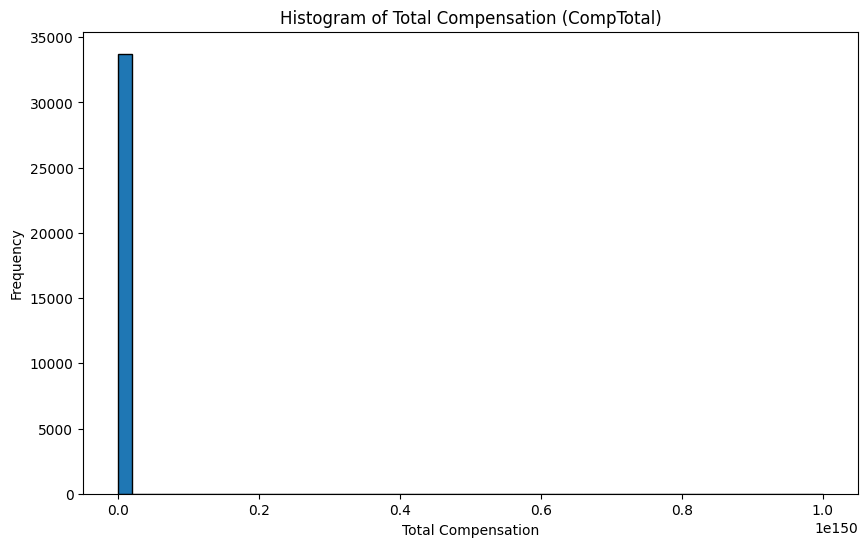

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# 1.1 Histogram of CompTotal (Total Compensation)
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comp_total = pd.read_sql_query(QUERY, conn)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comp_total['CompTotal'], bins=50, edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

# Close the connection
conn.close()

In [24]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# 1.1 Histogram of CompTotal (Total Compensation)
QUERY = "SELECT ResponseId, CompTotal FROM main WHERE CompTotal \
IS NOT NULL and ResponseId > 0 "
df_comp_total = pd.read_sql_query(QUERY, conn)
df_comp_total

,ResponseId,CompTotal
0,73,2040000.0
1,375,28000.0
2,380,85000.0
3,386,50000.0
4,390,110000.0
...,...,...
33735,65397,36000.0
33736,65402,40000.0
33737,65409,61000.0
33738,65413,58000.0


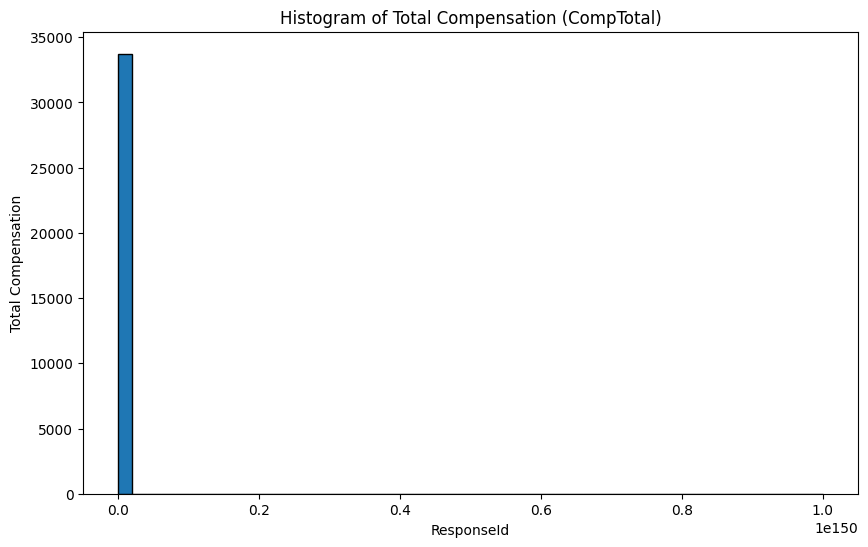

In [23]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# 1.1 Histogram of CompTotal (Total Compensation)
QUERY = "SELECT ResponseId, CompTotal FROM main WHERE CompTotal \
IS NOT NULL and ResponseId > 0 "
df_comp_total = pd.read_sql_query(QUERY, conn)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comp_total['CompTotal'], bins=50, edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('ResponseId')
plt.show()

# Close the connection
conn.close()

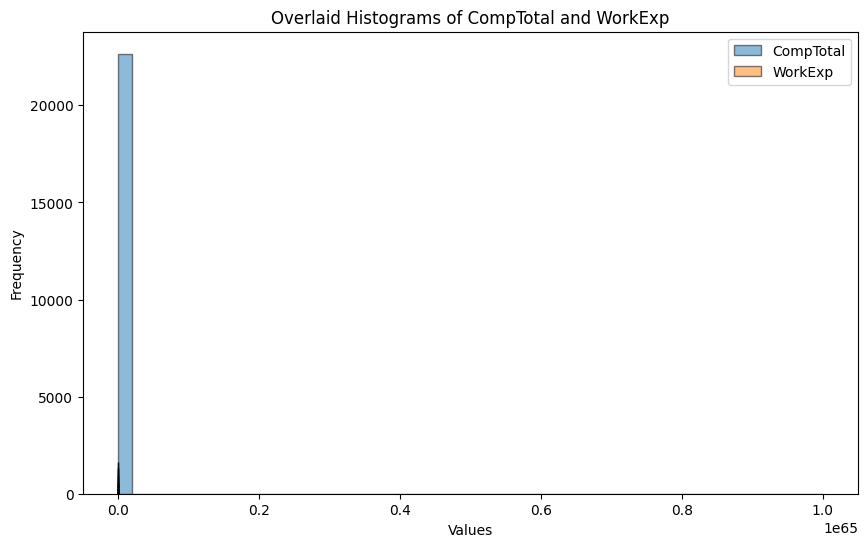

In [26]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get two fields (e.g., CompTotal and WorkExp)
QUERY = "SELECT CompTotal, WorkExp FROM main WHERE CompTotal IS NOT NULL AND WorkExp IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

# Plotting overlaid histograms
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=50, alpha=0.5, label='CompTotal', edgecolor='black')
plt.hist(df['WorkExp'], bins=50, alpha=0.5, label='WorkExp', edgecolor='black')
plt.title('Overlaid Histograms of CompTotal and WorkExp')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close the connection
conn.close()